<a href="https://colab.research.google.com/github/racheljhuh/EDA/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/DS3001/group3.git

Cloning into 'group3'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 125 (delta 49), reused 105 (delta 36), pack-reused 3
Receiving objects: 100% (125/125), 1.11 MiB | 14.99 MiB/s, done.
Resolving deltas: 100% (49/49), done.


**Data**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('./group3/project_2/data/training_data.csv')
df_test = pd.read_csv('./group3/project_2/data/testing_data.csv')
df_train = df_train.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)
df_test = df_test.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)


y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)

X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())
df_train.head()

X_train['smoking_status'].unique()
X_train['smoking_status'].value_counts()
X_train.loc[X_train['smoking_status']=='Unknown','smoking_status'] = 'never smoked'
X_train.loc[X_train['smoking_status']=='formerly smoked','smoking_status'] = 'smokes'
X_train.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,36.0,0,0,Govt_job,Urban,65.87,32.2,smokes
1,Female,45.0,0,0,Govt_job,Rural,68.66,25.3,never smoked
2,Male,58.0,0,0,Self-employed,Rural,170.93,30.7,never smoked
3,Female,61.0,0,0,Self-employed,Urban,69.88,27.1,never smoked
4,Female,78.0,0,0,Private,Urban,103.86,30.6,never smoked


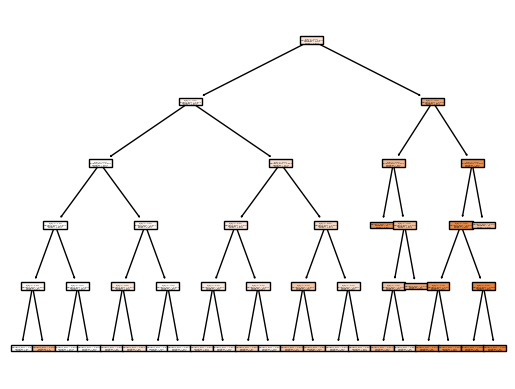

R-squared (R2): 0.06300373501753886
Root Mean Squared Error (RMSE): 0.20870589613090598


In [9]:
#Tree Model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X_train = X_train.loc[:,['age'] ]
X_test = X_test.loc[:,['age'] ]

y_train = df_train['stroke']

model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)

# Plot the tree
tree.plot_tree(cart, filled=True)
plt.show()

# Make predictions on the test set
y_pred = cart.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)



ValueError: ignored

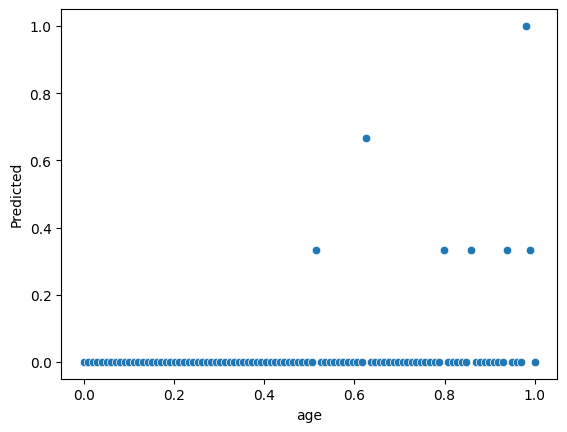

In [38]:
## KNN
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
import seaborn as sns

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X_train = X_train.loc[:,['age']]
X_test = X_test.loc[:,['age']]

# Apply maxmin to each column of X to get U:
X_train = X_train.apply(maxmin)

y_train = df_train['stroke']

k=3
model = kNNRegression(n_neighbors=k) # Create a sk model for k=3
fitted_model = model.fit(X_train,y_train) # Train the model on our data

N_x = 100 # Coarseness of x variable
N_y = 100 # Coarseness of y variable
total = N_x*N_y # Total number of points to plot

grid_x = np.linspace(0,1,N_x) # Create a grid of x values
grid_y = np.linspace(0,1,N_y) # Create a grid of y values

xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
X = xs.reshape(total) # Turns pairs into vectors
Y = ys.reshape(total) # Turns pairs into vectors

x_hat = pd.DataFrame({'age':X}) # Create a dataframe of points to plot
y_hat = fitted_model.predict(x_hat) # Fit the model to the points
x_hat['Predicted'] = y_hat # Add new variable to the dataframe

this_plot = sns.scatterplot(data=x_hat,x='age',y='Predicted') # Create seaborn plot
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas



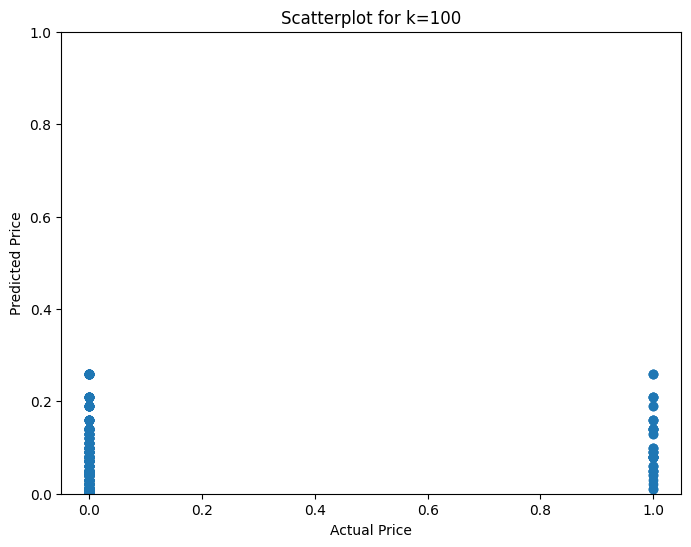

MSE for k=100: 0.043399511241446746


In [19]:
k_values = [100]
for k in k_values: #Used chat gpt to write this
    # Create a new figure for each k
    plt.figure(figsize=(8, 6))

    # Initialize and fit the k-nearest neighbors regression model
    knn = kNNRegression(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predict prices
    y_pred = knn.predict(X_test)

    # Create a scatterplot
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Scatterplot for k={k}')
    plt.ylim(y_test.min(), y_test.max()) #Set the same y axes for all plots

    # Save or show the plot
    plt.show()  # Uncomment this line to display the plot interactively

    # Compute and print MSE for each k value
    mse = mean_squared_error(y_test, y_pred)
    print(f'MSE for k={k}: {mse}')

In [12]:
## Linear Model
from sklearn.linear_model import LinearRegression # Import linear regression model
from sklearn.preprocessing import PolynomialFeatures

X_train_numeric = X_train.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_train_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
dummies = pd.concat([ pd.get_dummies(X_train['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_train['smoking_status'],dtype='int',drop_first=True)],axis=1)

#
Z_train = pd.concat([continuous,dummies],axis=1)

X_test_numeric = X_test.loc[:,['age','hypertension','heart_disease','bmi','avg_glucose_level'] ]
#
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X_test_numeric) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
continuous = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

dummies = pd.concat([ pd.get_dummies(X_test['work_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['Residence_type'],dtype='int',drop_first=True),
                      pd.get_dummies(X_test['smoking_status'],dtype='int',drop_first=True)],axis=1)
#
Z_test = pd.concat([continuous,dummies],axis=1)

# Fit the model and get the R2 measure:
reg = LinearRegression().fit(Z_train, y_train) # Fit the linear model
print('R2: ', reg.score(Z_test, y_test)) # R squared measure
y_hat = reg.predict(Z_test)
N = len(y_test)
print('RMSE: ', (np.sum( (y_test - y_hat)**2)/N )**.5 )   # R squared measure

ValueError: ignored